This first attempt is the implementation of deep Q learning to control 1 misconfiguration inverter. <br/>
Feeder: feeder13_U_R_Pecan_Solar, has one inverter.


In [2]:

from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import numpy as np

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']

DSSText.command = 'Compile C:/feeders/feeder13_U_R_Pecan_Solar/feeder13_U_R_Pecan_Solar.dss'
# This is a quick way to change properties of a specific group of device, here the regulator and cap controls are enabled
setRegInfo(DSSObj,list(DSSCircuit.RegControls.AllNames),'enabled',[1]* len(DSSCircuit.RegControls.AllNames))
setCapControlInfo(DSSObj,list(DSSCircuit.CapControls.AllNames),'enabled',[1]*len(DSSCircuit.CapControls.AllNames))


DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=1440 # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation
DSSSolution.Solve()

Monitor Name: meter_632_power


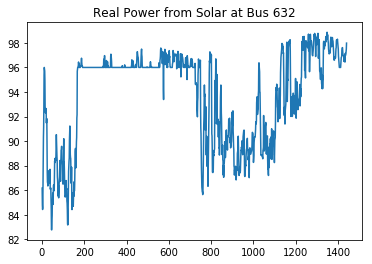

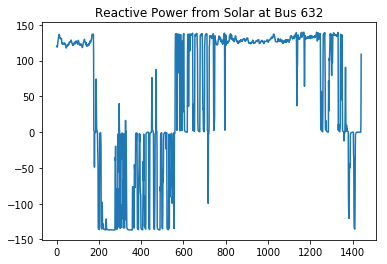

{'name': 'vv_curve_deadband', 'npts': 6, 'xarray': array([0.5 , 0.98, 0.99, 1.01, 1.02, 1.5 ]), 'yarray': array([ 1.,  1.,  0.,  0., -1., -1.])}


In [9]:
DSSMon=DSSCircuit.Monitors
DSSMon.Name='Meter_632_power'
print('Monitor Name: ' + DSSMon.Name )

#print(DSSMon.dblHour)
time=3600*np.asarray((DSSMon.dblHour))
Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

# Generation is negative in OpenDSS hence, multiply by -1
plt.figure()
plt.plot(time,-Real_power)
plt.title('Real Power from Solar at Bus 632')
plt.show()

plt.figure()
plt.plot(time,-Reactive_power)
plt.title('Reactive Power from Solar at Bus 632')
plt.show()

#DSSMon=DSSCircuit.Monitors
#DSSMon.Name='Meter_692_power'

#Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
#Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

#plt.figure()
#plt.plot(time,-Real_power)
#plt.title('Real Power from Solar at Bus 692')
#plt.show()

#plt.figure()
#plt.plot(time,-Reactive_power)
#plt.title('Reactive Power from Solar at Bus 692')
#plt.show()


# Getting a specific xycurve
xycurves=getXYCurveInfo(DSSObj,['vv_curve_deadband'])
# because it returns a list
vw_curve=xycurves[0]
# print to console
print(vw_curve)
# Change one parameter of the curve
#vw_curve['xarray']=np.asarray([1,1,1,1])
# making sure that the change happened
#print(vw_curve)
# set the curveinformation
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

# make sure that the change happened
#xycurves=getXYCurveInfo(DSSObj,['vw_curve'])
#vw_curve=xycurves[0]
#print(vw_curve)

# Error Checking, this will generate an error as npts do not match the length of the xarray
#vw_curve['xarray']=np.asarray([1,1,1,1,1])
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

(' V1', ' VAngle1', ' V2', ' VAngle2', ' V3', ' VAngle3', ' I1', ' IAngle1', ' I2', ' IAngle2', ' I3', ' IAngle3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


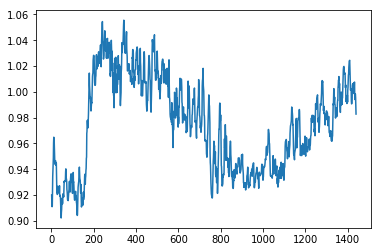

In [10]:
DSSMon.Name='Meter_632_voltage'
# just printing the meter headers
print(DSSMon.header)
# Unfortunately the channel does not have the time information (still under investigation)
time=3600*np.asarray(list(DSSMon.dblHour)) # Multiplying by 3600 converts it to seconds
# Reading the Voltage
Voltage_Phasea=np.asarray(DSSMon.Channel(1))
Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
Voltage_Phasec=np.asarray(DSSMon.Channel(5))
Voltage=Voltage_Phasea +Voltage_Phaseb+Voltage_Phasec
# dividing by the base and also taking average
plt.plot(time,Voltage/(3*2400))
plt.show()

###########################################################################################
###########################################################################################
###########################################################################################

0.0% 0.07% 0.14% 0.21% 0.28% 0.35% 0.42% 0.49% 0.56% 0.62% 0.69% 0.76% 0.83% 0.9% 0.97% 1.04% 1.11% 1.18% 1.25% 1.32% 1.39% 1.46% 1.53% 1.6% 1.67% 1.73% 1.8% 1.87% 1.94% 2.01% 2.08% 2.15% 2.22% 2.29% 2.36% 2.43% 2.5% 2.57% 2.64% 2.71% 2.78% 2.85% 2.91% 2.98% 3.05% 3.12% 3.19% 3.26% 3.33% 3.4% 3.47% 3.54% 3.61% 3.68% 3.75% 3.82% 3.89% 3.96% 4.02% 4.09% 4.16% 4.23% 4.3% 4.37% 4.44% 4.51% 4.58% 4.65% 4.72% 4.79% 4.86% 4.93% 5.0% 5.07% 5.14% 5.2% 5.27% 5.34% 5.41% 5.48% 5.55% 5.62% 5.69% 5.76% 5.83% 5.9% 5.97% 6.04% 6.11% 6.18% 6.25% 6.32% 6.38% 6.45% 6.52% 6.59% 6.66% 6.73% 6.8% 6.87% 6.94% 7.01% 7.08% 7.15% 7.22% 7.29% 7.36% 7.43% 7.49% 7.56% 7.63% 7.7% 7.77% 7.84% 7.91% 7.98% 8.05% 8.12% 8.19% 8.26% 8.33% 8.4% 8.47% 8.54% 8.61% 8.67% 8.74% 8.81% 8.88% 8.95% 9.02% 9.09% 9.16% 9.23% 9.3% 9.37% 9.44% 9.51% 9.58% 9.65% 9.72% 9.78% 9.85% 9.92% 9.99% 10.06% 10.13% 10.2% 10.27% 10.34% 10.41% 10.48% 10.55% 10.62% 10.69% 10.76% 10.83% 10.9% 10.96% 11.03% 11.1% 11.17% 11.24% 11.31% 11.38% 11.45% 

84.87% 84.94% 85.01% 85.08% 85.15% 85.22% 85.29% 85.36% 85.43% 85.5% 85.57% 85.63% 85.7% 85.77% 85.84% 85.91% 85.98% 86.05% 86.12% 86.19% 86.26% 86.33% 86.4% 86.47% 86.54% 86.61% 86.68% 86.75% 86.81% 86.88% 86.95% 87.02% 87.09% 87.16% 87.23% 87.3% 87.37% 87.44% 87.51% 87.58% 87.65% 87.72% 87.79% 87.86% 87.93% 87.99% 88.06% 88.13% 88.2% 88.27% 88.34% 88.41% 88.48% 88.55% 88.62% 88.69% 88.76% 88.83% 88.9% 88.97% 89.04% 89.1% 89.17% 89.24% 89.31% 89.38% 89.45% 89.52% 89.59% 89.66% 89.73% 89.8% 89.87% 89.94% 90.01% 90.08% 90.15% 90.22% 90.28% 90.35% 90.42% 90.49% 90.56% 90.63% 90.7% 90.77% 90.84% 90.91% 90.98% 91.05% 91.12% 91.19% 91.26% 91.33% 91.39% 91.46% 91.53% 91.6% 91.67% 91.74% 91.81% 91.88% 91.95% 92.02% 92.09% 92.16% 92.23% 92.3% 92.37% 92.44% 92.51% 92.57% 92.64% 92.71% 92.78% 92.85% 92.92% 92.99% 93.06% 93.13% 93.2% 93.27% 93.34% 93.41% 93.48% 93.55% 93.62% 93.68% 93.75% 93.82% 93.89% 93.96% 94.03% 94.1% 94.17% 94.24% 94.31% 94.38% 94.45% 94.52% 94.59% 94.66% 94.73% 94.8% 94.86%

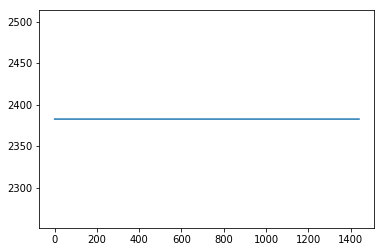

In [19]:
# This code runs the 13 Node Balanced Model using the Python OpenDSS interface
# The code also runs the custom FBS functions to compare the results
# Please make sure you have the necessary libraries, and the required libraries are in the same folder with the MATLAB code
# Be advised: While Running OpenDSS, python changes the current directory, hence the matlab code is run first to avoid additional coding
# Make sure you have the updated version of Anaconda for all libraries to run, OpenDSS installed 
# For a custom made dictionary, the key is always in lower case
from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import tan,acos
import os

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']
DSSMon=DSSCircuit.Monitors
power_factor=0.9
reactivepowercontribution=tan(acos(power_factor))
NodeVoltageToPlot=634
IncludeSolar=1
SlackBusVoltage=1.0
DSSText.Command="Compile C:/feeders/feeder13_B_R/feeder13BR.dss"

LoadBusNames=['load_634','load_645','load_646','load_652','load_671','load_675','load_692','load_611']
LoadList=np.array([6,7,8,13,3,12,11,10])-1
#get the real load from Texas day
Load=pd.read_csv('C:/feeders/13busload.csv',header=None)
Load=1/1000*(Load.values)
#get the real solar from Texas day
Solar=pd.read_csv('C:/feeders/Solar.csv',header=None)
Solar=1/1000*(Solar.values)
TotalTimeSteps,Nodes= Load.shape # Initialize the total time steps according to the data

DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=1 # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation

VoltageOpenDSS=np.zeros(shape=(TotalTimeSteps,)) #save voltage at each step into this array
#SubstationRealPowerOpenDSS=np.zeros(shape=(TotalTimeSteps,)) #save real power at each step into this array
setSourceInfo(DSSObj,['source'],'pu',[SlackBusVoltage]) # Setting the slack bus voltage
#BusVoltageToPlot='bus_'+ str(NodeVoltageToPlot)

for ksim in range(TotalTimeSteps):
    print(round(ksim/TotalTimeSteps*100, 2), end="% ")
    # Setting the real and reactive power of the loads
    setLoadInfo(DSSObj,LoadBusNames,'kw',Load[ksim][LoadList]-IncludeSolar*Solar[ksim][LoadList])
    setLoadInfo(DSSObj, LoadBusNames, 'kvar', reactivepowercontribution*(Load[ksim][LoadList] - IncludeSolar*Solar[ksim][LoadList]))
    # Solving the OpenDSS Power FLow
    DSSSolution.Solve()
    #LineInfo=getLineInfo(DSSObj,['L_U_650'])
    #bus1power = [d['bus1powerreal'] for d in LineInfo]
    #SubstationRealPowerOpenDSS[ksim]=bus1power[0] # This is done as the variable is a list, and the first element of the list, this can be done by doing a list.append, but array is done for speed issue
    #BusInfo=getBusInfo(DSSObj,[BusVoltageToPlot])
    #voltagepu=[d['voltagepu'] for d in BusInfo]
    #VoltageOpenDSS[ksim]=voltagepu[0]
    DSSMon.Name='meter_634_voltage'
    Voltage_Phasea=np.asarray(DSSMon.Channel(1))
    Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
    Voltage_Phasec=np.asarray(DSSMon.Channel(5))
    VoltageOpenDSS[ksim]=(Voltage_Phasea[0]+Voltage_Phaseb[0]+Voltage_Phasec[0])/3
    
plt.plot(VoltageOpenDSS)

In [20]:
print(VoltageOpenDSS)

[2382.47314453 2382.47314453 2382.47314453 ... 2382.47314453 2382.47314453
 2382.47314453]
